
# Problem Set 0 — Prior Knowledge Warm‑Up

**Goal.** This notebook helps you self‑check the prerequisite topics:
- Python / Jupyter / NumPy
- Linear Algebra
- Calculus
- Probability / Statistics
- Optimization (Convex function, Quadratic Program, KKT condition)

Each section has short tasks. Some cells include light tests. It's okay if you can't finish everything right away—use this to guide your review.

## 0) Jupyter notebook

# Different size of title
## Different size of title
### Different size of title
#### Different size of title

$$x^2$$

$$\begin{align}
    &\min_x f(x) \\
    s.t.~~~& g(x) = 0
\end{align}$$

In [1]:
# Data type
integar_a = 1
float_b = 1.5
string_c = "Hello"
print(integar_a, float_b, string_c)

1 1.5 Hello


In [2]:
# List
l = [integar_a, '123', [1, 2, 3, 4 ], 1 + 1j]
print(l)
print("The first element of list l is", l[0])
l.append(5)
print("After append, l is", l)

[1, '123', [1, 2, 3, 4], (1+1j)]
The first element of list l is 1
After append, l is [1, '123', [1, 2, 3, 4], (1+1j), 5]


In [3]:
# index
l = [0,1,2,3,4,5,6,7,8,9] 
print(l[2:5]) # [2, 3, 4]
print(l[2:])  # [2, 3, 4, 5, 6, 7, 8, 9]
print(l[:5])  # [0, 1, 2, 3, 4]
print(l[-3:]) # [7, 8, 9]
print(l[:-3]) # [0, 1, 2, 3, 4, 5, 6]
print(l[::2])   # [0, 2, 4, 6, 8]

[2, 3, 4]
[2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4]
[7, 8, 9]
[0, 1, 2, 3, 4, 5, 6]
[0, 2, 4, 6, 8]



## 1) Python / Jupyter / NumPy

Warm‑up tasks to get comfortable with arrays, broadcasting, vectorization, and plotting.


In [7]:

# --- Setup & helpers (run this first) ---
import math
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
rng = np.random.default_rng(0)


In [ ]:
#### CODING EXERCISES ####
# 1.a) Create a length‑5 NumPy array `a` with values [0, 1, 2, 3, 4]
# TODO: set a = ...
a = np.array([0,1,2,3,4])

# 1.b) Create another array `b` of the same length where b[i] = a[i]^2 (vectorized).
# TODO: set b = ...
b = a**2

# 1.c) Compute the dot product of `a` and `b` and store in `ab_dot`.
# TODO: set ab_dot = ...
ab_dot = a @ b

# 1.d) Use boolean indexing to select elements of `b` that are > 5. Store in `b_gt_5`.
# TODO: set b_gt_5 = ...
b_gt_5 = b[b>5]

print(a, b, ab_dot, b_gt_5)


[0 1 2 3 4] [ 0  1  4  9 16] 100 [ 9 16]


Text(0, 0.5, 'y')

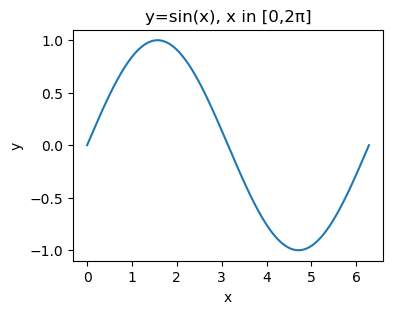

In [15]:
#### CODING EXERCISES ####
# 1.e) Plotting (Matplotlib only — no seaborn).
# TODO: Plot y = sin(x) for x in [0, 2π]. Create a single figure.
# Hint: Use np.linspace, plt.figure, plt.plot, plt.title
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.title("y=sin(x), x in [0,2π]")
plt.xlabel("x")
plt.ylabel("y")


## 2) Linear Algebra

**Topics:** norms, matrix multiplication, eigen/SVD.


#### Norms
Let $V$ be a vector space (e.g. $\mathbb{R}^n$ or $\mathbb{C}^n$).  
A function
$$\|\cdot\| : V \to [0,\infty)$$
is called a **norm** on $V$ if for all $\mathbf{x}, \mathbf{y} \in V$ and scalars $\alpha$, the following hold:

1. **Non-negativity and definiteness** 
   $$\|\mathbf{x}\| \geq 0, 
   \quad \|\mathbf{x}\| = 0 \iff \mathbf{x} = \mathbf{0}$$

2. **Homogeneity**  
   $$\|\alpha \mathbf{x}\| = |\alpha| \, \|\mathbf{x}\|$$

3. **Triangle inequality**  
   $$\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|$$

A common class of norms are the $\ell_p$ norms, defined as
$$
\|\mathbf{x}\|_p = \left( \sum_{i=1}^n |x_i|^p \right)^{1/p}, \quad (1 \leq p < \infty),
$$
and
$$
\|\mathbf{x}\|_\infty = \max_{1 \leq i \leq n} |x_i|.
$$

PAPER and PEN EXERCISES

2.a) **TODO**: Give the formulation of $l_2$ norm of a vector $x = [x_1,x_2,x_3,x_4,x_5]$

$\|x\|_2 = \sqrt{x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2}$

2.b) Give the $l_2$ norm of a vector $y = [1,5,3,1]$

$\|y\|_2 = 6$

In [16]:
#### CODING EXERCISES ####
# 2.c) Norms in numpy （Hint: np.linalg.norm）
x = np.array([1,2,3,4,5])
x_norm = np.linalg.norm(x)
print(x_norm)  

7.416198487095663


#### Matrix Operations

A **matrix** is a rectangular array of numbers with $m$ rows and $n$ columns.  
For example, $A \in \mathbb{R}^{m \times n}$ can be written as
$$
A =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}.
$$

- **Addition**: If $A, B \in \mathbb{R}^{m \times n}$, then
$$
A + B = (a_{ij} + b_{ij})_{m \times n}.
$$

- **Scalar multiplication**: For $\alpha \in \mathbb{R}$,
$$
\alpha A = (\alpha \cdot a_{ij})_{m \times n}.
$$

- **Matrix multiplication**: If $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{n \times p}$, then
$$
C = AB \in \mathbb{R}^{m \times p}, \quad c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}.
$$


In [17]:
#### CODING EXERCISES ####
# 2.d) Matrix multiplication in numpy
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# TODO: C = AB
C = A @ B
print("AB =\n", C)


AB =
 [[19 22]
 [43 50]]


#### Eigenvalues and Eigenvectors

Let $A \in \mathbb{R}^{n \times n}$ be a square matrix.  
A scalar $\lambda \in \mathbb{R}$ is called an **eigenvalue** of $A$ if there exists a nonzero vector $\mathbf{v} \in \mathbb{R}^n$ such that
$$
A \mathbf{v} = \lambda \mathbf{v}.
$$
Here, $\mathbf{v}$ is called an **eigenvector** corresponding to $\lambda$.


PAPER and PEN EXERCISES

2.e) **TODO**: Give an eigenvalue and corresponding eigenvector of matrix 

$A = \begin{bmatrix}1 & 2 \\ 2 & 1\end{bmatrix}$.

$\lambda =$ -1 or 3

For $\lambda = -1$, $\left\{\begin{bmatrix} t \\ -t \end{bmatrix}: t \in \mathbb{R}\right\}.$ Hence, $v = \begin{bmatrix}1 \\ -1\end{bmatrix}$

For $\lambda = 3$, $\left\{\begin{bmatrix} t \\ t \end{bmatrix}: t \in \mathbb{R}\right\}.$ Hence, $v = \begin{bmatrix}1 \\ 1\end{bmatrix}$

In [21]:
#### CODING EXERCISES ####
# 2.f) Eigen value in numpy
A = np.array([[1, 2],
              [2, 1]])

eigvals, eigvecs = np.linalg.eig(A)

print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

Eigenvalues: [ 3. -1.]
Eigenvectors:
 [[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]


#### Positive Semidefinite (PSD) Matrices

**Definition.** A symmetric matrix $A\in\mathbb{R}^{n\times n}$ is **positive semidefinite (PSD)** if
$$
\mathbf{x}^\top A\,\mathbf{x}\ \ge 0\quad \text{for all }\mathbf{x}\in\mathbb{R}^n.
$$
It is **positive definite (PD)** if the inequality is strict for all $\mathbf{x}\ne \mathbf{0}$.

**Equivalent characterizations (PSD).**
- All eigenvalues of $A$ are nonnegative: $\lambda_i(A)\ge 0$.
- $A$ is a Gram matrix: there exists $B\in\mathbb{R}^{m\times n}$ with $A=B^\top B$.
- All principal submatrices of a PSD matrix are PSD.

#### PAPER and PEN EXERCISES

2.g) **TODO**:
$$
A=\begin{bmatrix}2&-1\\-1&2\end{bmatrix},\quad
B=\begin{bmatrix}1&0&0\\0&0&0\\0&0&2\end{bmatrix},\quad
$$
- (g.1) Compute eigenvalues of each matrix and decide PSD/PD/indefinite.  
$\lambda = 1 or 3.$ Hence, PD.
  
   
- (g.2) For $B$, verify directly that $\mathbf{x}^\top B\,\mathbf{x}\ge 0$ for all $\mathbf{x}$.



## 3) Calculus

**Topics:** gradients, Hessians;


#### Gradient & Hessian 

- **Gradient.** For a differentiable scalar field $f: \mathbb{R}^n\to\mathbb{R}$,
  
$$
\nabla f(\mathbf{x})=
\begin{bmatrix}
\frac{\partial f}{\partial x_1}(\mathbf{x})\\
\vdots\\
\frac{\partial f}{\partial x_n}(\mathbf{x})
\end{bmatrix},
\qquad
$$

- **Hessian.** If second partials exist,
$$
\nabla^2 f(\mathbf{x})=\left[\frac{\partial^2 f}{\partial x_i\,\partial x_j}(\mathbf{x})\right]_{i,j=1}^n.
$$


PAPER and PEN EXERCISES

3.a) **TODO**: For $f(\mathbf{x})=\tfrac12\,\mathbf{x}^\top A\,\mathbf{x}+\mathbf{b}^\top\mathbf{x}+c$ with symmetric \(A\),
$$
\nabla f(\mathbf{x})= A\mathbf{x} + \mathbf{b}
$$
$$
\nabla^2 f(\mathbf{x})= \mathbf{A}
$$

#### Convex Functions

**Definition (convex).** Let $f:\mathbb{R}^n\to(-\infty,+\infty]$ with a **convex domain** $D$
 
$f$ is **convex** if for all $x,y\in D$ and $t\in[0,1]$,
$$
f(tx+(1-t)y)\ \le\ t\,f(x)+(1-t)\,f(y).
$$
It is **strictly convex** if the inequality is strict whenever $x\neq y$ and $t\in(0,1)$.

**Second-order condition ($C^2$ on a convex domain).** $f$ is convex iff
$$
\nabla^2 f(x)\ \succeq\ 0\quad \text{for all }x\in D.
$$


PAPER and PEN EXERCISES

3.b) **TODO**: Show the condition when $f(\mathbf{x})=\tfrac12\,\mathbf{x}^\top A\,\mathbf{x}+\mathbf{b}^\top\mathbf{x}+c$ is convex.

$f(\mathbf{x})$ is convex when its Hessian, $\mathbf{A}$, is positive semidefinite.


## 4) Statistic

**Topics:** Normal & Uniform distribution, Expectation, Variance

#### Basic definition
- **Expectation (mean).**  
Discrete: 
$$
\mathbb{E}[X]=\sum_x x\,\mathbb{P}(X=x)
$$
Continuous:
$$
\mathbb{E}[X]=\int_{-\infty}^{\infty} x\,f_X(x)\,dx
$$

- **Variance.**
$$
\operatorname{Var}(X)=\mathbb{E}\!\left[(X-\mathbb{E}[X])^2\right]
=\mathbb{E}[X^2]-\big(\mathbb{E}[X]\big)^2.
$$

- **Normal (Gaussian) distribution.** Define $X\sim \mathcal{N}(\mu,\sigma^2)$:
$$
f(x)=\frac{1}{\sqrt{2\pi}\,\sigma}\exp\!\left(-\frac{(x-\mu)^2}{2\sigma^2}\right),\qquad
\mathbb{E}[X]=\mu,\quad \operatorname{Var}(X)=\sigma^2.
$$

- **Uniform distribution on \([a,b]\).** Define $X\sim \mathcal{U}(a,b)$,
$$
f(x)=\frac{1}{b-a}\quad (a\le x\le b),\qquad
\mathbb{E}[X]=\frac{a+b}{2},\quad
\operatorname{Var}(X)=\frac{(b-a)^2}{12}.
$$

In [23]:
#### CODING EXERCISES ####
# 4.a) TODO: Normal distribution

# Normal N(mu, sigma^2) (Hint: np.random.normal)
mu, sigma = 2.0, 3.0
z = np.random.normal(mu, sigma, 10000)
print("Normal sample mean/var ~", z.mean(), z.var())

# 4.b) TODO: Uniform distribution 

# Uniform U(a, b) (Hint: np.random.uniform)
a, b = -1.0, 5.0
u = np.random.uniform(a,b,10000)
print("Uniform sample mean/var ~", u.mean(), u.var())

# Theoretical checks
print("Normal theory mean/var =", mu, sigma**2)
print("Uniform theory mean/var =", (a+b)/2, (b-a)**2/12)


Normal sample mean/var ~ 1.9712472492752877 9.007666352482765
Uniform sample mean/var ~ 2.0314531440541255 2.997708627709728
Normal theory mean/var = 2.0 9.0
Uniform theory mean/var = 2.0 3.0


#### Bayes' Theorem

**Statement** For events $A$ and $B$ with $\mathbb{P}(B)>0$,
$$
\mathbb{P}(A\mid B)=\frac{\mathbb{P}(B\mid A)\,\mathbb{P}(A)}{\mathbb{P}(B)}.
$$
Here, $\mathbb{P}(A)$ is the **prior**, $\mathbb{P}(B\mid A)$ the **likelihood**, $\mathbb{P}(A\mid B)$ the **posterior**, and $\mathbb{P}(B)$ the **evidence**.

**Total probability** If $\{H_i\}$ is a partition of the sample space,
$$
\mathbb{P}(B)=\sum_i \mathbb{P}(B\mid H_i)\,\mathbb{P}(H_i).
$$


PAPER and PEN EXERCISES

4.c) **TODO**:

You pick one of two boxes at random (each with probability $1/2$):
- Box $A$: $3$ red ball, $1$ blue ball.
- Box $B$: $1$ red ball, $3$ blue ball.

You then draw one ball and observe it is red. What is $\mathbb{P}(A \mid \text{red})$?
3/4





## 5) Optimization

**Topics:** cvxpy, KKT condition.

#### Linear Programming Example

We want to solve the following linear program:

$$
\begin{aligned}
\max_{x,y}\quad & x + y \\
\text{s.t.}\quad 
& x + 2y \leq 4, \\
& 2x + y \leq 6, \\
& x \geq 0,\ y \geq 0.
\end{aligned}
$$


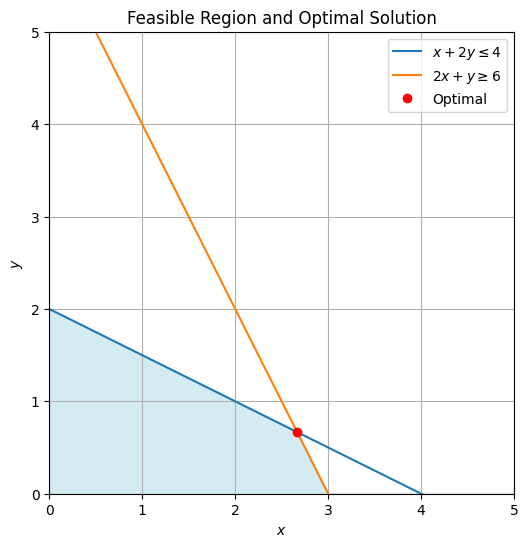

In [11]:
# visualization
x = np.linspace(0, 5, 200)

y1 = (4 - x) / 2
y2 = 6 - 2*x

# Feasible region: intersection
plt.figure(figsize=(6,6))

# Plot constraint lines
plt.plot(x, y1, label=r"$x+2y \leq 4$")
plt.plot(x, y2, label=r"$2x+y \geq 6$")

# Fill feasible region
y_upper = np.minimum(y1, y2)
y_upper = np.maximum(y_upper, 0)  # ensure non-negative
plt.fill_between(x, 0, y_upper, where=(y_upper>=0), color="lightblue", alpha=0.5)

# Mark optimal point (from CVXPY solution)
opt_x, opt_y = 8/3, 2/3
plt.plot(opt_x, opt_y, "ro", label="Optimal")

# Labels and formatting
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Feasible Region and Optimal Solution")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import cvxpy as cp

#### CODING EXERCISES ####

# 4.a) TODO: Define variables
# Variables
x = cp.Variable()
y = cp.Variable()

# 4.b) TODO: Define objectives
# Objective: maximize x + y
# (Hint: cp.Maximize)
objective = cp.Maximize(x+y)

# 4.c) TODO: Define constraints
# Constraints:
# x + 2y <= 4
# 4x + 2y <= 12
# x >= 0
# y >= 0
constraints = [
    x + 2*y <= 4,
    4*x + 2*y <= 12,
    x >=0,
    y >= 0
]

# Problem definition
# (Hint: cp.Problem)
problem = cp.Problem(objective, constraints)

# Solve
problem.solve()

print("status:", problem.status)
print("optimal value:", problem.value)
print("optimal (x,y):", x.value, y.value)

status: optimal
optimal value: 3.333333332201236
optimal (x,y): 2.6666666676628243 0.6666666645384114


#### KKT condition

You don't need to fully understand but learn to use it as a tool.

The **Karush–Kuhn–Tucker (KKT) conditions** are necessary conditions for a solution $x^*$ to be optimal in a constrained optimization problem of the form:

$$
\begin{aligned}
\min_{x}\quad & f(x) \\
\text{s.t.}\quad & g_i(x) \leq 0,\quad i=1,\dots,m, \\
& h_j(x) = 0,\quad j=1,\dots,p.
\end{aligned}
$$

**KKT conditions** (assuming regularity conditions hold):

1. **Primal feasibility**  
   $$
   g_i(x^*) \leq 0, \quad h_j(x^*) = 0
   $$

2. **Dual feasibility**  
   $$
   \lambda_i \geq 0, \quad i=1,\dots,m
   $$

3. **Stationarity**  
   $$
   \nabla f(x^*) + \sum_{i=1}^m \lambda_i \nabla g_i(x^*) + \sum_{j=1}^p \mu_j \nabla h_j(x^*) = 0
   $$

4. **Complementary slackness**  
   $$
   \lambda_i g_i(x^*) = 0, \quad i=1,\dots,m
   $$

Here:
- $\lambda_i$ is defined as **Lagrange multipliers** for inequality constraints.
- $\mu_j$ is defined as **Lagrange multipliers** for equality constraints.

PAPER and PEN EXERCISES

5. a) **TODO**: Solve KKT by hand

We solve
$$
\begin{aligned}
\min_{x\in\mathbb{R}^2}\quad & f(x)=x^\top x + c^\top x,\quad c=\begin{bmatrix}-2\\-6\end{bmatrix} \\
\text{s.t.}\quad & a^\top x = 3,\quad a=\begin{bmatrix}1\\1\end{bmatrix},\\
& x \ge 0
\end{aligned}
$$

**KKT (by hand)** :

In [34]:
#### CODING EXERCISES ####
# 5. b) Verify using cvxpy
c = np.array([-2.0, -6.0])
a = np.array([1.0, 1.0])

x = cp.Variable(2)
objective = cp.Minimize(cp.sum_squares(x) + c@x)
con_eq = [a@x == 3]
con_nn = [-x <= 0]
prob = cp.Problem(objective, con_eq + con_nn)
prob.solve()

x_cvx = x.value
mu = con_eq[0].dual_value     # equality multiplier
nu = con_nn[0].dual_value     # inequality multipliers

print("status:", prob.status)
print("x* (cvxpy):", x_cvx)

status: optimal
x* (cvxpy): [0.5 2.5]



## 6) Gym environment

Just have fun interacting with gym!

In [26]:
import gymnasium as gym

# Build deterministic FrozenLake env
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
obs, info = env.reset(seed=42)

episode_return = 0.0
done = False

# --- Helpers ---
def _colors(desc):
    code_map = {b'H': 0, b'F': 1, b'S': 2, b'G': 3}
    return np.vectorize(lambda b: code_map[b])(desc)

def draw_board(desc, s):
    nrow, ncol = desc.shape
    grid = _colors(desc)
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap([
        (0,0,0),        # hole
        (0.7,0.85,1.0), # ice
        (0.2,0.7,0.2),  # start
        (1.0,0.84,0.0)  # goal
    ])
    fig, ax = plt.subplots(figsize=(4,4))
    ax.imshow(grid, cmap=cmap, vmin=0, vmax=3)
    ax.set_xticks(np.arange(-0.5, ncol, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, nrow, 1), minor=True)
    ax.grid(which="minor", color="white", linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    r, c = divmod(int(s), ncol)
    ax.plot(c, r, marker="o", markersize=18,
            markeredgecolor="white", markerfacecolor="red")
    plt.title("FrozenLake-v1 (4x4)")
    plt.show()

def step_once(action):
    global obs, done, episode_return
    if done:
        print("Episode finished. Please reset the env.")
        return
    step = env.step(action)
    if len(step) == 5:
        obs, reward, terminated, truncated, info = step
        done = terminated or truncated
    else:
        obs, reward, done, info = step
    episode_return += reward
    print(f"Action {action}, Reward {reward}, Return {episode_return}, Done {done}")
    draw_board(env.unwrapped.desc, env.unwrapped.s)

def reset_env(seed=None):
    global obs, done, episode_return
    obs, info = env.reset(seed=seed)
    done = False
    episode_return = 0.0
    print("Environment reset.")

In [27]:
# Run this when you start a new game
reset_env(seed=42)

Environment reset.


In [32]:
step_once(2)   # do action=2 (right)
# change the step yourself and see what happens
# 0: left, 1: down, 2: right, 3: up

Episode finished. Please reset the env.
